<a href="https://colab.research.google.com/github/romanozamoth/transfer-learning-ml-dio/blob/main/New_model_train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install transformers torch torchvision scikit-learn pillow


In [ ]:
from transformers import CLIPProcessor, CLIPModel
from PIL import Image
import torch
import os
import numpy as np
from sklearn.linear_model import LogisticRegression
import joblib


In [ ]:
from zipfile import ZipFile
from google.colab import files

# Subir o seu dataset.zip com os modelos que quer treinar
uploaded = files.upload()

# Supondo que você fez upload de dataset.zip com estrutura de pastas
with ZipFile("dataset.zip", "r") as zip_ref:
    zip_ref.extractall("dataset")


In [ ]:
# Carrega modelo CLIP
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")
model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32").to("cpu")

def get_clip_features(image_path):
    image = Image.open(image_path).convert("RGB")
    inputs = processor(images=image, return_tensors="pt").to("cpu")
    with torch.no_grad():
        features = model.get_image_features(**inputs)
    return features[0].numpy()

X, y = [], []
base_path = "dataset/"

# pega automaticamente o nome das pastas como labels
labels = sorted([d for d in os.listdir(base_path) if os.path.isdir(os.path.join(base_path, d))])

for label in labels:
    for file in os.listdir(f"{base_path}/{label}"):
        path = os.path.join(base_path, label, file)
        if path.lower().endswith((".png", ".jpg", ".jpeg")):
            feat = get_clip_features(path)
            X.append(feat)
            y.append(label)

clf = LogisticRegression(max_iter=1000)
clf.fit(X, y)


In [ ]:
joblib.dump(clf, "modelo_clip.pkl")


In [ ]:
from google.colab import files
files.download("modelo_clip.pkl")


In [ ]:
import joblib
clf = joblib.load("modelo_clip.pkl")


In [ ]:
# TESTAR MODELO SEGUINDO TODO FLUXO DO COLAB.
from PIL import Image
from google.colab import files
import matplotlib.pyplot as plt

# Função para prever e exibir resultado
def prever_imagem(path_imagem):
    # Abrir e exibir imagem
    img = Image.open(path_imagem).convert("RGB")

    # Extrair embeddings e fazer predição
    features = get_clip_features(path_imagem)  # Essa função deve estar definida antes
    predicao = clf.predict([features])[0]

    # Exibir imagem com título da predição
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Predição: {predicao}")
    plt.show()

# Fazer upload de imagem
uploaded = files.upload()

# Para cada imagem enviada, mostrar predição
for fn in uploaded.keys():
    prever_imagem(fn)


Saving modelo_clip.pkl to modelo_clip (2).pkl


Saving _dGOBblcD9D6D7E6S0Zqlqhb0EcHNyma0t1xROlVtADKrXD3cR7au3fb55Losnt8VqOtSmn5aLWENVNoy-0JqPf23vJNg-LRmmLSyIdG1VBZsdAZY3SmNnqt9PMxgQs5excSD4jlsd1-yEJ30zcYoIurffnqs1LynUOblVCS229U_oNqkRRwgRm5a0RHlmI2jEK9X7rqF.jpeg to _dGOBblcD9D6D7E6S0Zqlqhb0EcHNyma0t1xROlVtADKrXD3cR7au3fb55Losnt8VqOtSmn5aLWENVNoy-0JqPf23vJNg-LRmmLSyIdG1VBZsdAZY3SmNnqt9PMxgQs5excSD4jlsd1-yEJ30zcYoIurffnqs1LynUOblVCS229U_oNqkRRwgRm5a0RHlmI2jEK9X7rqF (1).jpeg
Saving 6MAMg0H_BrGipKDAwsVpeuu4R2rvf1OtNgF_uykpt85GEf7Z8LPprfsD9svHIW1ssrWhZunFrehU-D06UHk0T6sj7F1CJJqHI4uUR12Q-JB2YgZ85gM8ji73Ime5GSj_rsYzv-8zOOZUwgMpE1-bzGrBQqqlebvFbk39tFnRuJipwsB1DD2hJRKEj8hJtrMme6JfJGb0iBV15bcqhtyx.jpeg to 6MAMg0H_BrGipKDAwsVpeuu4R2rvf1OtNgF_uykpt85GEf7Z8LPprfsD9svHIW1ssrWhZunFrehU-D06UHk0T6sj7F1CJJqHI4uUR12Q-JB2YgZ85gM8ji73Ime5GSj_rsYzv-8zOOZUwgMpE1-bzGrBQqqlebvFbk39tFnRuJipwsB1DD2hJRKEj8hJtrMme6JfJGb0iBV15bcqhtyx (1).jpeg
Saving 6VnJyAhvN7nbT3nVOCReRzOfRdlXNPJ2HfvHkanPPg8RX2YxrOCQb5Fs88OEIgSs1ABmdC1zomovFbdyaIEUkRH6sAPjahqfk-9XCp_eTXlabnfn7Hp

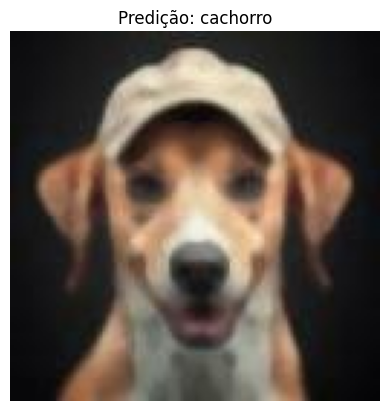

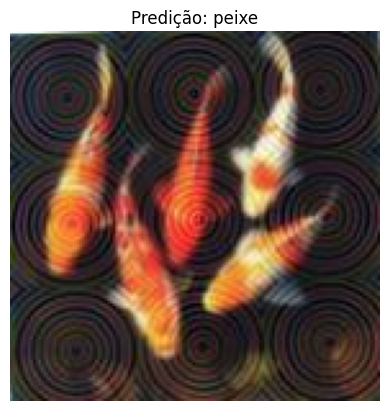

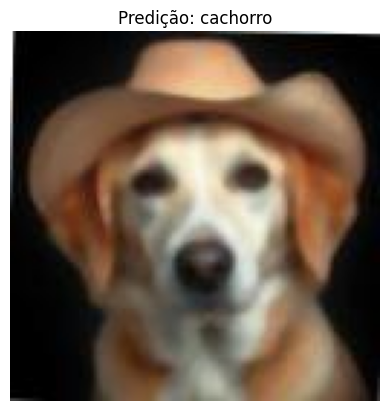

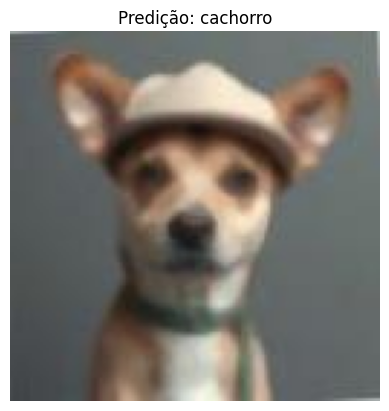

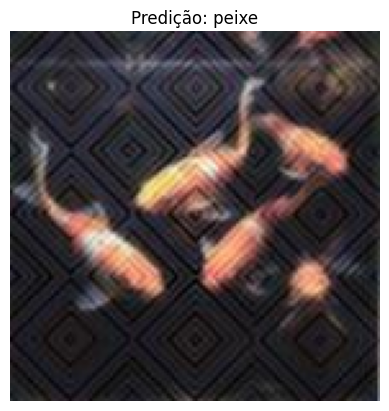

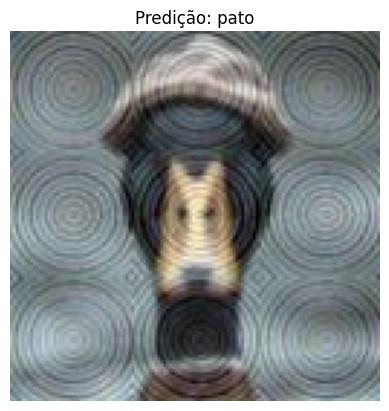

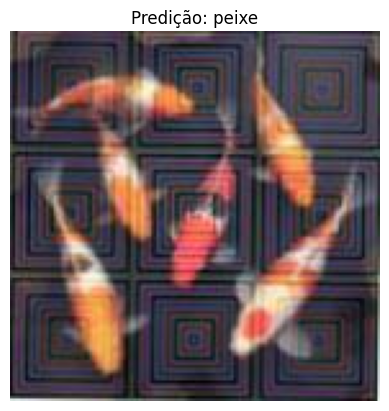

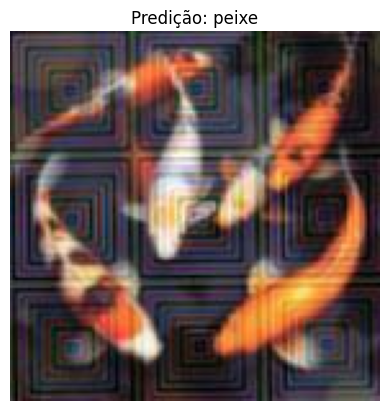

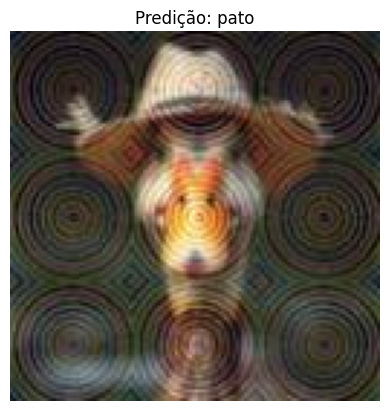

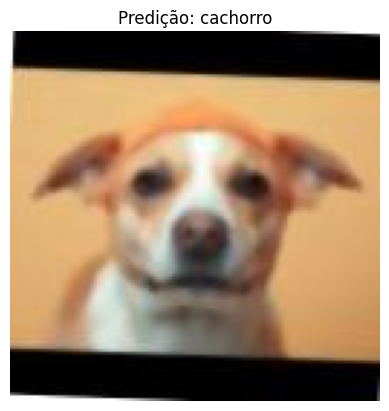

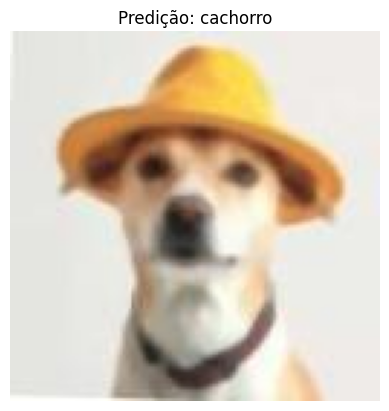

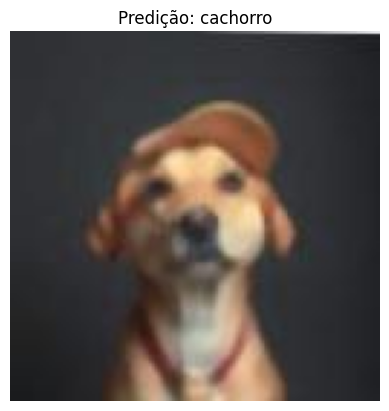

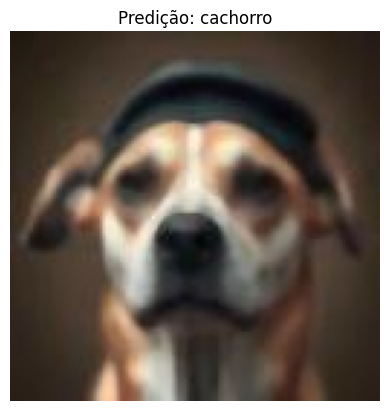

In [ ]:
# TESTAR MODELO CARREGANDO O MODELO JÁ TREINADO!
from transformers import CLIPProcessor, CLIPModel
import torch
from PIL import Image
from google.colab import files
import matplotlib.pyplot as plt
import joblib

# Subir o seu modelo treinado 'modelo_clip.pkl'
uploaded = files.upload()
clf = joblib.load("modelo_clip.pkl")

processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")
model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32").to("cpu")

def get_clip_features(image_path):
    image = Image.open(image_path).convert("RGB")
    inputs = processor(images=image, return_tensors="pt").to("cpu")
    with torch.no_grad():
        features = model.get_image_features(**inputs)
    return features[0].numpy()

# Função para prever e exibir resultado
def prever_imagem(path_imagem):
    # Abrir e exibir imagem
    img = Image.open(path_imagem).convert("RGB")

    # Extrair embeddings e fazer predição
    features = get_clip_features(path_imagem)  # Essa função deve estar definida antes
    predicao = clf.predict([features])[0]

    # Exibir imagem com título da predição
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Predição: {predicao}")
    plt.show()

# Fazer upload de imagem
uploaded = files.upload()

# Para cada imagem enviada, mostrar predição
for fn in uploaded.keys():
    prever_imagem(fn)
